In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from matplotlib.figure import Figure 
from wordcloud import WordCloud

In [2]:
df_normal  = pd.read_csv('data.csv') # Load các thông tin các video về âm nhạc thường
df_normal.head()

,id,title,description,channelTitle,categoryId,tags,defaultAudioLanguage,publishedAt,duration,definition,caption,viewCount,likeCount,commentCount,favoriteCount,topicCategories,madeForKids,privacyStatus,embeddable,defaultLanguage
0,0nljmuN19DU,Nhạc Tập GYM Cực Phê Xem Chỉ Muốn Đi Tập Ngay,Follow kênh Tiktok của Ad nhé: https://www.tik...,Tôi Yêu GYM,17,"[""thể hình"",""idol gym"",""jeffseid"",""Ryan Terry""]",vi,2018-09-18T02:23:17Z,PT29M29S,hd,False,6258052.0,23333.0,751.0,0,"[""https://en.wikipedia.org/wiki/Lifestyle_(soc...",False,public,True,NaN
1,dxrYz563OdY,NHẠC TẬP GYM💪NHẠC TẬP GYM CỰC HAY 2020💪MUSIQUE...,►NHẠC TẬP GYM💪NHẠC TẬP GYM CỰC HAY 2020💪MUSIQU...,Đình Khởi Production,10,"[""nhạc tập gym"",""nhac tap gym"",""nhạc tập gym c...",NaN,2020-07-14T12:30:45Z,PT1H14M6S,hd,False,2685742.0,15861.0,390.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,NaN
2,GZj8vOfutTA,NHẠC TẬP GYM CỰC CHẤT 2023 | Best Workout Musi...,NHẠC TẬP GYM CỰC CHẤT 2023 | Best Workout Musi...,Nhạc Tập Gym,17,"[""nhạc tập gym"",""nhac tap gym"",""nhạc tập gym 2...",vi,2023-01-07T10:29:13Z,PT2H6M6S,hd,False,56056.0,220.0,1.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,vi
3,N6rS6lYZwTM,NHẠC EDM MIX TẬP GYM |#1| NHẠC TẬP GYM 2020 | ...,Đến Với Việt Hoàng Fitness Để Tìm Cảm Hứng Tập...,Việt Hoàng Fitness,22,NaN,NaN,2020-05-05T13:03:30Z,PT39M16S,hd,False,3147955.0,15207.0,475.0,0,"[""https://en.wikipedia.org/wiki/Health"",""https...",False,public,True,NaN
4,QhV1hEFKs3Q,Nhạc Tập Gym | Nhạc Tập Gym Cực Chất 2021 EDM ...,#nhactapgym #nhạctậpgym #nhactaptheduc #nhạctậ...,Gymer Việt Nam,22,NaN,NaN,2021-09-06T07:55:20Z,PT1H28M31S,sd,False,94097.0,336.0,4.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,NaN


In [3]:
# Xem thông tin tổng quan về data frame
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7474 non-null   object 
 1   title                 7474 non-null   object 
 2   description           7176 non-null   object 
 3   channelTitle          7474 non-null   object 
 4   categoryId            7474 non-null   int64  
 5   tags                  6183 non-null   object 
 6   defaultAudioLanguage  3972 non-null   object 
 7   publishedAt           7474 non-null   object 
 8   duration              7474 non-null   object 
 9   definition            7474 non-null   object 
 10  caption               7474 non-null   bool   
 11  viewCount             7473 non-null   float64
 12  likeCount             6088 non-null   float64
 13  commentCount          7350 non-null   float64
 14  favoriteCount         7474 non-null   int64  
 15  topicCategories      

In [5]:
# Filter out music videos ie categoryId is 10 – Music
df_normal = df_normal[df_normal['categoryId']==10]

In [3]:
# Handling null values ​​in data frames
df_normal_preprocessed = df_normal.fillna({'description':'', 'tags':'', 'defaultAudioLanguage':'', 'likeCount':0, 'commentCount':0, 'topicCategories':'', 'defaultLanguage': '' })
df_normal_preprocessed.head()

,id,title,description,channelTitle,categoryId,tags,defaultAudioLanguage,publishedAt,duration,definition,caption,viewCount,likeCount,commentCount,favoriteCount,topicCategories,madeForKids,privacyStatus,embeddable,defaultLanguage
0,0nljmuN19DU,Nhạc Tập GYM Cực Phê Xem Chỉ Muốn Đi Tập Ngay,Follow kênh Tiktok của Ad nhé: https://www.tik...,Tôi Yêu GYM,17,"[""thể hình"",""idol gym"",""jeffseid"",""Ryan Terry""]",vi,2018-09-18T02:23:17Z,PT29M29S,hd,False,6258052.0,23333.0,751.0,0,"[""https://en.wikipedia.org/wiki/Lifestyle_(soc...",False,public,True,
1,dxrYz563OdY,NHẠC TẬP GYM💪NHẠC TẬP GYM CỰC HAY 2020💪MUSIQUE...,►NHẠC TẬP GYM💪NHẠC TẬP GYM CỰC HAY 2020💪MUSIQU...,Đình Khởi Production,10,"[""nhạc tập gym"",""nhac tap gym"",""nhạc tập gym c...",,2020-07-14T12:30:45Z,PT1H14M6S,hd,False,2685742.0,15861.0,390.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,
2,GZj8vOfutTA,NHẠC TẬP GYM CỰC CHẤT 2023 | Best Workout Musi...,NHẠC TẬP GYM CỰC CHẤT 2023 | Best Workout Musi...,Nhạc Tập Gym,17,"[""nhạc tập gym"",""nhac tap gym"",""nhạc tập gym 2...",vi,2023-01-07T10:29:13Z,PT2H6M6S,hd,False,56056.0,220.0,1.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,vi
3,N6rS6lYZwTM,NHẠC EDM MIX TẬP GYM |#1| NHẠC TẬP GYM 2020 | ...,Đến Với Việt Hoàng Fitness Để Tìm Cảm Hứng Tập...,Việt Hoàng Fitness,22,,,2020-05-05T13:03:30Z,PT39M16S,hd,False,3147955.0,15207.0,475.0,0,"[""https://en.wikipedia.org/wiki/Health"",""https...",False,public,True,
4,QhV1hEFKs3Q,Nhạc Tập Gym | Nhạc Tập Gym Cực Chất 2021 EDM ...,#nhactapgym #nhạctậpgym #nhactaptheduc #nhạctậ...,Gymer Việt Nam,22,,,2021-09-06T07:55:20Z,PT1H28M31S,sd,False,94097.0,336.0,4.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,


In [7]:
df_normal.describe()

,categoryId,viewCount,likeCount,commentCount,favoriteCount
count,4296.0,4.296000e+03,3.407000e+03,4.226000e+03,4296.0
mean,10.0,9.080179e+06,1.696781e+05,2.064906e+04,0.0
std,0.0,6.056792e+07,1.256674e+06,3.283954e+05,0.0
min,10.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,10.0,7.349750e+03,1.145000e+02,1.000000e+00,0.0
50%,10.0,8.252250e+04,1.342000e+03,1.550000e+01,0.0
75%,10.0,8.817882e+05,8.775500e+03,1.017500e+02,0.0
max,10.0,1.706661e+09,3.656092e+07,1.598075e+07,0.0


In [8]:
# Draw a statistical pie chart according to the number of views of the videos
def pieCharViewCounts(df):
    listVideo_10KView = df[df['viewCount']<100000]['id']
    listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
    listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
    listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
    listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']

    y = np.array([len(listVideo_10KView),
                    len(listVideo_100KView),
                    len(listVideo_1MView),
                    len(listVideo_10MView),
                    len(listVideo_100MView),
                ])
    mylabel = ['Video 10 thousand views', 'Video 100 thousand views', 'Video million views', 'Video 10 million views', 'Video 100 million views']
   
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.pie(y, labels=mylabel)
    plt.show()

/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


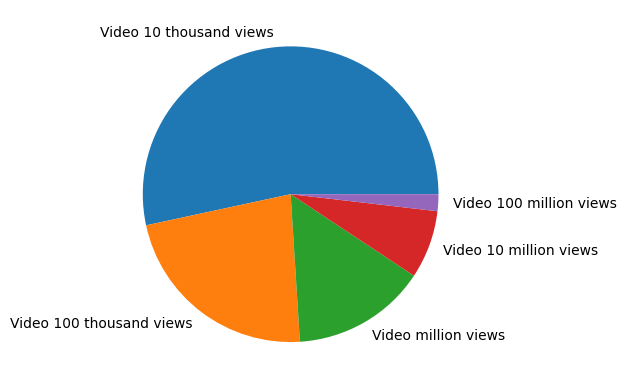

In [9]:
pieCharViewCounts(df_normal)

#### Xử lý tag và tên channel (thêm "_" vào các tag)



In [10]:
df_normal_preprocessed['tags'].fillna('', inplace=True)


In [11]:
def removeSpace(listItems, noise):
    tagsPreprocessed = []
    for item in listItems:
        if item == noise:
            tagsPreprocessed.append(item)
            continue
        item = item.replace(' ','_')
        item = item.replace(',_',', ')
        tagsPreprocessed.append(item)
    # print(tagsPreprocessed)
    return tagsPreprocessed

In [12]:
print(df_normal_preprocessed['tags'])
tagsPreprocessed = removeSpace(df_normal_preprocessed['tags'], ' ')
# df_normal_preprocessed.drop(columns=['tags'])
# df_normal_preprocessed.assign(tags = tagsPreprocessed)
# print(df_normal_preprocessed['tags'])
# print(tagsPreprocessed)
df_normal_preprocessed['tags'] = tagsPreprocessed

1       ["nhạc tập gym","nhac tap gym","nhạc tập gym c...
10      ["yêu edm","yeu edm","edm","nhạc điện tử","nha...
11      ["nhac khong loi","nhac khong loi soi dong","n...
13                                                       
16      ["workout music","workout mix","gym workout mu...
                              ...                        
7463    ["#nhạc quê hương","bolero","Anna Nguyễn","nhạ...
7464    ["Karaoke","song ca","song ca cùng lâm","karao...
7465    ["#KARAOKE","#KARAOKE ONLINE","#ÂM NHẠC ĐÀ NẴN...
7466    ["Mạnh Cường","Mạnh Cường Âm Nhạc","Du lịch","...
7470                                                     
Name: tags, Length: 4296, dtype: object


In [13]:
t = ['1', '2']
print(t)
a = ["2", "3"]
print(a)
print(df_normal_preprocessed['tags'])


['1', '2']
['2', '3']
1       ["nhạc_tập_gym","nhac_tap_gym","nhạc_tập_gym_c...
10      ["yêu_edm","yeu_edm","edm","nhạc_điện_tử","nha...
11      ["nhac_khong_loi","nhac_khong_loi_soi_dong","n...
13                                                       
16      ["workout_music","workout_mix","gym_workout_mu...
                              ...                        
7463    ["#nhạc_quê_hương","bolero","Anna_Nguyễn","nhạ...
7464    ["Karaoke","song_ca","song_ca_cùng_lâm","karao...
7465    ["#KARAOKE","#KARAOKE_ONLINE","#ÂM_NHẠC_ĐÀ_NẴN...
7466    ["Mạnh_Cường","Mạnh_Cường_Âm_Nhạc","Du_lịch","...
7470                                                     
Name: tags, Length: 4296, dtype: object


#### Handling topic categories

In [15]:
df_normal_preprocessed['topicCategories'] = df_normal['topicCategories'].fillna('')

In [16]:
listTopics=[]
for index, row in df_normal_preprocessed.iterrows():
    listTopic = row['topicCategories']
    if listTopic == '':
        listTopics.append(listTopic)
        continue
    topicStr = ''
    listTopic = listTopic.replace('https://en.wikipedia.org/wiki/','')
    listTopic = listTopic.replace('"Music"','')
    listTopic = listTopic.replace(',','')
    listTopic = listTopic.replace('[','')
    listTopic = listTopic.replace(']','')
    listTopic = listTopic.replace('\'','')
    print(listTopic)
    listTopics.append(listTopic)
    #     #topic = topic.removesuffix("https://en.wikipedia.org/wiki/")
    #     print(topic)

print(type(listTopics))

"Electronic_music""Physical_fitness"
"Electronic_music"
"Electronic_music""Pop_music"
"Lifestyle_(sociology)""Physical_fitness"
"Health""Hip_hop_music""Lifestyle_(sociology)""Physical_fitness"
"Electronic_music""Hip_hop_music""Physical_fitness"
"Electronic_music""Music_of_Asia""Pop_music"
"Electronic_music"
"Health""Lifestyle_(sociology)""Physical_fitness"
"Electronic_music""Pop_music"
"Lifestyle_(sociology)""Physical_fitness"
"Electronic_music""Physical_fitness"
"Electronic_music""Hip_hop_music"
"Health""Lifestyle_(sociology)""Physical_fitness"
"Electronic_music""Lifestyle_(sociology)""Physical_fitness"
"Lifestyle_(sociology)""Physical_fitness"
"Health""Lifestyle_(sociology)""Physical_fitness"
"Electronic_music""Hip_hop_music"
"Music_of_Asia""Pop_music"
"Electronic_music""Hip_hop_music""Physical_fitness"
"Lifestyle_(sociology)""Physical_fitness"
"Lifestyle_(sociology)""Physical_fitness"
"Electronic_music""Pop_music"
"Lifestyle_(sociology)""Physical_fitness"
"Lifestyle_(sociology)""Phy

In [17]:
df_normal_preprocessed['topicCategories'] = listTopics
df_normal_preprocessed

,id,title,description,channelTitle,categoryId,tags,defaultAudioLanguage,publishedAt,duration,definition,caption,viewCount,likeCount,commentCount,favoriteCount,topicCategories,madeForKids,privacyStatus,embeddable,defaultLanguage
1,dxrYz563OdY,NHẠC TẬP GYM💪NHẠC TẬP GYM CỰC HAY 2020💪MUSIQUE...,►NHẠC TẬP GYM💪NHẠC TẬP GYM CỰC HAY 2020💪MUSIQU...,Đình Khởi Production,10,"[""nhạc_tập_gym"",""nhac_tap_gym"",""nhạc_tập_gym_c...",,2020-07-14T12:30:45Z,PT1H14M6S,hd,False,2685742.0,15861.0,390.0,0,"""Electronic_music""""Physical_fitness""",False,public,True,
10,O8_tb1pDU8g,Top 10 Bản Nhạc EDM Mix Cực Phiêu ♫ Gây Nghiện...,#yeuedm #nhacdientu #nhacedmgaynghien #edm\n__...,Yêu EDM,10,"[""yêu_edm"",""yeu_edm"",""edm"",""nhạc_điện_tử"",""nha...",vi,2019-10-28T04:15:11Z,PT24M36S,hd,False,12524709.0,122129.0,3837.0,0,"""Electronic_music""",False,public,True,
11,D1iLQpNjjUk,"Nhạc Không Lời Sôi Động, Vui Tươi, Tạo Động Lự...","Nhạc Không Lời Sôi Động, Vui Tươi, Tạo Động Lự...",Khoảng Lặng Cuộc Sống,10,"[""nhac_khong_loi"",""nhac_khong_loi_soi_dong"",""n...",,2018-07-31T01:54:49Z,PT1H4M27S,hd,False,962519.0,5911.0,265.0,0,"""Electronic_music""""Pop_music""",False,public,True,
13,lx5wQRUg6UQ,VIỆT MIX TẬP GYM |#21| NHẠC TẬP GYM 2022 | ĐỘN...,➡️Đến Với Việt Hoàng Fitness Để Tìm Cảm Hứng T...,Việt Hoàng Fitness,10,,,2022-04-21T04:50:37Z,PT40M5S,hd,False,309017.0,2503.0,32.0,0,"""Lifestyle_(sociology)""""Physical_fitness""",False,public,True,
16,wY-gdjBUuMk,Best Workout Music Mix 2023 🔥 Gym Motivation M...,- Best Workout Music Mix 2023 🔥 Gym Motivati...,Trap Workout Mix,10,"[""workout_music"",""workout_mix"",""gym_workout_mu...",en,2023-04-13T12:23:28Z,PT1H10M13S,hd,False,158223.0,908.0,10.0,0,"""Health""""Hip_hop_music""""Lifestyle_(sociology)""...",False,public,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,NBjSFnWuYW4,LẠY PHẬT QUAN ÂM - Anna Yến Phượng | ST: Hàn C...,LẠY PHẬT QUAN ÂM - Anna Yến Phượng | ST: Hàn C...,Anna Yến Phượng Official,10,"[""#nhạc_quê_hương"",""bolero"",""Anna_Nguyễn"",""nhạ...",,2023-06-17T12:00:07Z,PT5M28S,hd,False,8087.0,14.0,16.0,0,"""Music_of_Asia""",False,public,True,
7464,PzpQ8bI4Htc,Đam Mê - Sáng Tác Zoãn Bình - Lâm Organ ( Khôn...,#karaoke #thieugiongnu #damme\n► Tác Phẩm : Đa...,Song Ca Cùng Lâm,10,"[""Karaoke"",""song_ca"",""song_ca_cùng_lâm"",""karao...",,2023-06-19T01:26:59Z,PT4M38S,hd,False,1868.0,104.0,17.0,0,,False,public,True,
7465,c6Dfig6CU9E,[Karaoke] GIỌT LỆ ĐÀI TRANG - TONE NỮ ! ÂM NH...,Đây là kênh ÂM NHẠC MỌI THỂ LOẠI. \nMọi ngườ...,Âm Nhạc Đà Nẵng,10,"[""#KARAOKE"",""#KARAOKE_ONLINE"",""#ÂM_NHẠC_ĐÀ_NẴN...",vi,2023-06-17T03:52:59Z,PT7M8S,hd,False,47.0,1.0,0.0,0,"""Music_of_Asia""""Pop_music""",False,public,True,
7466,6vrDt_s5wnA,Âm nhạc-chuyên cover bài hát hay- tên kênh Mạn...,Chúc các bạn luôn luôn hạnh phúc và thành công...,Mạnh Cường,10,"[""Mạnh_Cường"",""Mạnh_Cường_Âm_Nhạc"",""Du_lịch"",""...",vi,2023-06-16T20:00:16Z,PT16S,hd,False,59.0,2.0,0.0,0,,False,public,True,


#### Handling time

In [18]:
def convertHour(str):
    if str.find('H') == -1:
        return 0
    hour = str.split('T')[1].split('H')[0]
    return hour

def convertMinute(str):
    if str.find('M') == -1:
        return 0
    if str.find('H') != -1:
        minute = str.split('H')[1].split('M')[0]
    else:
        minute = str.split('T')[1].split('M')[0]
    return minute

def convertSecond(str):
    if str.find('S') == -1:
        return 0
    if str.find('M') == -1:
        if str.find('H') == -1:
            second = str.split('T')[1].split('S')[0]
        else:    
            second = str.split('H')[1].split('S')[0]
    else:
        second = str.split('M')[1].split('S')[0]
    return second

In [19]:
hours, minutes, seconds = [], [], []
years, months, days = [], [], []
durationInt = []
for index, row in df_normal.iterrows():
    hours.append(int(convertHour(row['duration'])))
    minutes.append(int(convertMinute(row['duration'])))
    seconds.append(int(convertSecond(row['duration'])))
    years.append(int(row['publishedAt'].split('-',1)[0]))
    months.append(int(row['publishedAt'].split('-',1)[1].split('-',1)[0]))
    days.append(int(row['publishedAt'].split('-',2)[2].split('T')[0]))
    durationInt.append(hours[-1]*60*60+minutes[-1]*60+seconds[-1])

In [20]:
df_normal_preprocessed = df_normal_preprocessed.assign(hourDuration=hours, minuteDuration=minutes, secondDuration=seconds, yearPublished=years, monthPublished=months, dayPublished=days, durationInt = durationInt)
df_normal_preprocessed.head()

,id,title,description,channelTitle,categoryId,tags,defaultAudioLanguage,publishedAt,duration,definition,...,privacyStatus,embeddable,defaultLanguage,hourDuration,minuteDuration,secondDuration,yearPublished,monthPublished,dayPublished,durationInt
1,dxrYz563OdY,NHẠC TẬP GYM💪NHẠC TẬP GYM CỰC HAY 2020💪MUSIQUE...,►NHẠC TẬP GYM💪NHẠC TẬP GYM CỰC HAY 2020💪MUSIQU...,Đình Khởi Production,10,"[""nhạc_tập_gym"",""nhac_tap_gym"",""nhạc_tập_gym_c...",,2020-07-14T12:30:45Z,PT1H14M6S,hd,...,public,True,,1,14,6,2020,7,14,4446
10,O8_tb1pDU8g,Top 10 Bản Nhạc EDM Mix Cực Phiêu ♫ Gây Nghiện...,#yeuedm #nhacdientu #nhacedmgaynghien #edm\n__...,Yêu EDM,10,"[""yêu_edm"",""yeu_edm"",""edm"",""nhạc_điện_tử"",""nha...",vi,2019-10-28T04:15:11Z,PT24M36S,hd,...,public,True,,0,24,36,2019,10,28,1476
11,D1iLQpNjjUk,"Nhạc Không Lời Sôi Động, Vui Tươi, Tạo Động Lự...","Nhạc Không Lời Sôi Động, Vui Tươi, Tạo Động Lự...",Khoảng Lặng Cuộc Sống,10,"[""nhac_khong_loi"",""nhac_khong_loi_soi_dong"",""n...",,2018-07-31T01:54:49Z,PT1H4M27S,hd,...,public,True,,1,4,27,2018,7,31,3867
13,lx5wQRUg6UQ,VIỆT MIX TẬP GYM |#21| NHẠC TẬP GYM 2022 | ĐỘN...,➡️Đến Với Việt Hoàng Fitness Để Tìm Cảm Hứng T...,Việt Hoàng Fitness,10,,,2022-04-21T04:50:37Z,PT40M5S,hd,...,public,True,,0,40,5,2022,4,21,2405
16,wY-gdjBUuMk,Best Workout Music Mix 2023 🔥 Gym Motivation M...,- Best Workout Music Mix 2023 🔥 Gym Motivati...,Trap Workout Mix,10,"[""workout_music"",""workout_mix"",""gym_workout_mu...",en,2023-04-13T12:23:28Z,PT1H10M13S,hd,...,public,True,,1,10,13,2023,4,13,4213


#### Handling name of video

In [21]:
# Function to remove some interfering words
def removeStopword(texts, stopwords):
    tmpList = []
    for text in texts:
        text = text.lower()
        for stopword in stopwords:
            text = text.replace(stopword,'')
        tmpList.append(text)
    return tmpList

#### Process column values to integers

In [22]:
le_captions = preprocessing.LabelEncoder()
le_captions.fit(df_normal['caption'])
df_normal_preprocessed['caption'] = le_captions.transform(df_normal['caption'])

le_embeddables = preprocessing.LabelEncoder()
le_embeddables.fit(df_normal['embeddable'])
df_normal_preprocessed['embeddable'] = le_embeddables.transform(df_normal['embeddable'])

le_madeForKids = preprocessing.LabelEncoder()
le_madeForKids.fit(df_normal['madeForKids'])
df_normal_preprocessed['madeForKids'] = le_madeForKids.transform(df_normal['madeForKids'])

le_privacyStatus = preprocessing.LabelEncoder()
le_privacyStatus.fit(df_normal['privacyStatus'])
df_normal_preprocessed['privacyStatus'] = le_privacyStatus.transform(df_normal['privacyStatus'])

le_definitions = preprocessing.LabelEncoder()
le_definitions.fit(df_normal['definition'])
df_normal_preprocessed['definition'] = le_definitions.transform(df_normal['definition'])

In [23]:
df_normal_preprocessed.head()


,id,title,description,channelTitle,categoryId,tags,defaultAudioLanguage,publishedAt,duration,definition,...,privacyStatus,embeddable,defaultLanguage,hourDuration,minuteDuration,secondDuration,yearPublished,monthPublished,dayPublished,durationInt
1,dxrYz563OdY,NHẠC TẬP GYM💪NHẠC TẬP GYM CỰC HAY 2020💪MUSIQUE...,►NHẠC TẬP GYM💪NHẠC TẬP GYM CỰC HAY 2020💪MUSIQU...,Đình Khởi Production,10,"[""nhạc_tập_gym"",""nhac_tap_gym"",""nhạc_tập_gym_c...",,2020-07-14T12:30:45Z,PT1H14M6S,0,...,0,1,,1,14,6,2020,7,14,4446
10,O8_tb1pDU8g,Top 10 Bản Nhạc EDM Mix Cực Phiêu ♫ Gây Nghiện...,#yeuedm #nhacdientu #nhacedmgaynghien #edm\n__...,Yêu EDM,10,"[""yêu_edm"",""yeu_edm"",""edm"",""nhạc_điện_tử"",""nha...",vi,2019-10-28T04:15:11Z,PT24M36S,0,...,0,1,,0,24,36,2019,10,28,1476
11,D1iLQpNjjUk,"Nhạc Không Lời Sôi Động, Vui Tươi, Tạo Động Lự...","Nhạc Không Lời Sôi Động, Vui Tươi, Tạo Động Lự...",Khoảng Lặng Cuộc Sống,10,"[""nhac_khong_loi"",""nhac_khong_loi_soi_dong"",""n...",,2018-07-31T01:54:49Z,PT1H4M27S,0,...,0,1,,1,4,27,2018,7,31,3867
13,lx5wQRUg6UQ,VIỆT MIX TẬP GYM |#21| NHẠC TẬP GYM 2022 | ĐỘN...,➡️Đến Với Việt Hoàng Fitness Để Tìm Cảm Hứng T...,Việt Hoàng Fitness,10,,,2022-04-21T04:50:37Z,PT40M5S,0,...,0,1,,0,40,5,2022,4,21,2405
16,wY-gdjBUuMk,Best Workout Music Mix 2023 🔥 Gym Motivation M...,- Best Workout Music Mix 2023 🔥 Gym Motivati...,Trap Workout Mix,10,"[""workout_music"",""workout_mix"",""gym_workout_mu...",en,2023-04-13T12:23:28Z,PT1H10M13S,0,...,0,1,,1,10,13,2023,4,13,4213


##### Distribution of videos by number of views, like

(array([3.37e+03, 2.00e+01, 7.00e+00, 3.00e+00, 3.00e+00, 2.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([       0. ,  3656092.5,  7312185. , 10968277.5, 14624370. ,
        18280462.5, 21936555. , 25592647.5, 29248740. , 32904832.5,
        36560925. ]),
 <BarContainer object of 10 artists>)

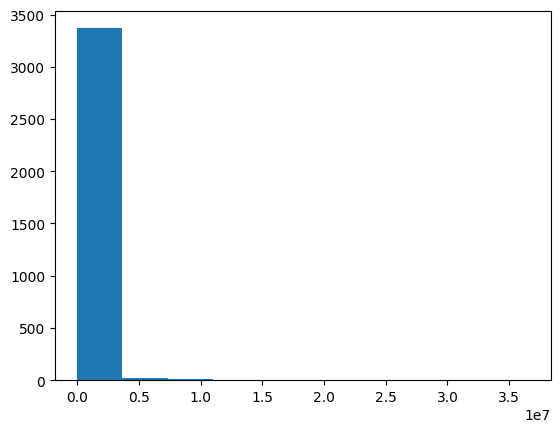

In [24]:
plt.hist(df_normal['likeCount'])


(array([2587.,  178.,  104.,   58.,   52.,   38.,   29.,   22.,   19.,
          20.]),
 array([    0.,  9923., 19846., 29769., 39692., 49615., 59538., 69461.,
        79384., 89307., 99230.]),
 <BarContainer object of 10 artists>)

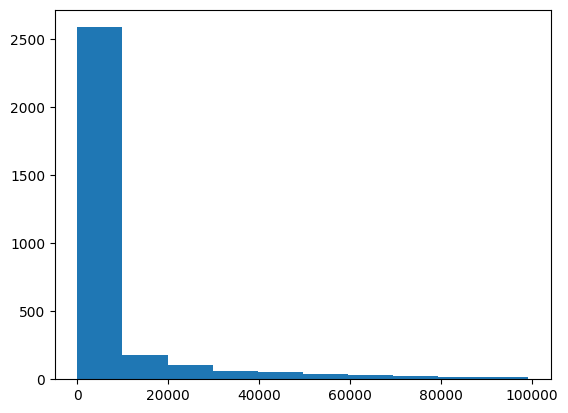

In [25]:
plt.hist(df_normal[df_normal['likeCount']<1e5]['likeCount'])

(array([4.252e+03, 2.100e+01, 9.000e+00, 7.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00000000e+00, 1.70666135e+08, 3.41332270e+08, 5.11998405e+08,
        6.82664540e+08, 8.53330675e+08, 1.02399681e+09, 1.19466294e+09,
        1.36532908e+09, 1.53599522e+09, 1.70666135e+09]),
 <BarContainer object of 10 artists>)

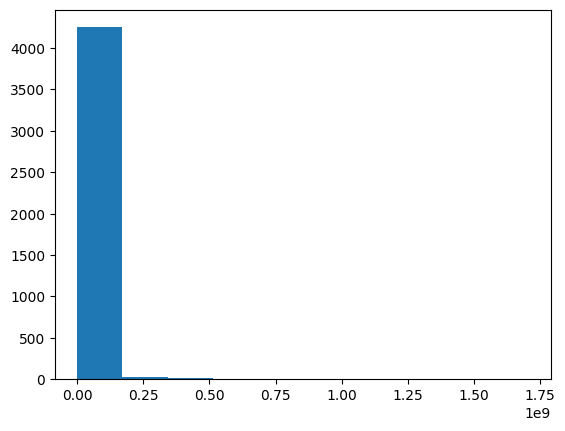

In [26]:
plt.hist(df_normal['viewCount'])

(array([2291.,  395.,  150.,  124.,   98.,   56.,   48.,   36.,   34.,
          30.]),
 array([     0. ,  99985.2, 199970.4, 299955.6, 399940.8, 499926. ,
        599911.2, 699896.4, 799881.6, 899866.8, 999852. ]),
 <BarContainer object of 10 artists>)

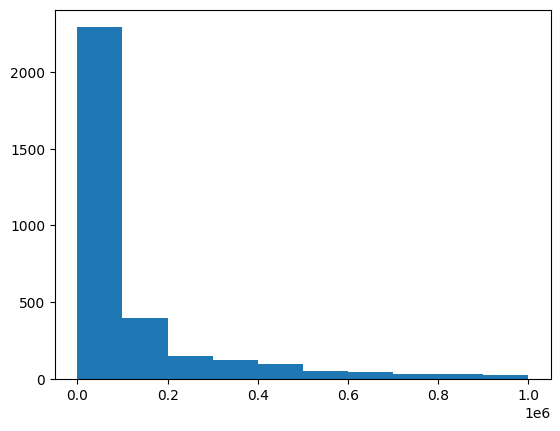

In [27]:
plt.hist(df_normal[df_normal['viewCount']<1e6]['viewCount'])

(array([4.082e+03, 1.260e+02, 1.300e+01, 1.100e+01, 6.100e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  8613.3, 17226.6, 25839.9, 34453.2, 43066.5, 51679.8,
        60293.1, 68906.4, 77519.7, 86133. ]),
 <BarContainer object of 10 artists>)

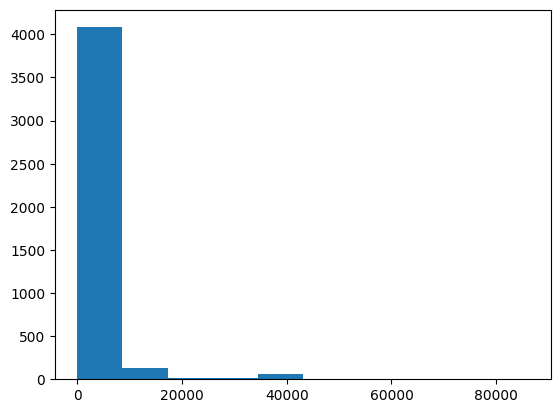

In [28]:
plt.hist(df_normal_preprocessed['durationInt'])

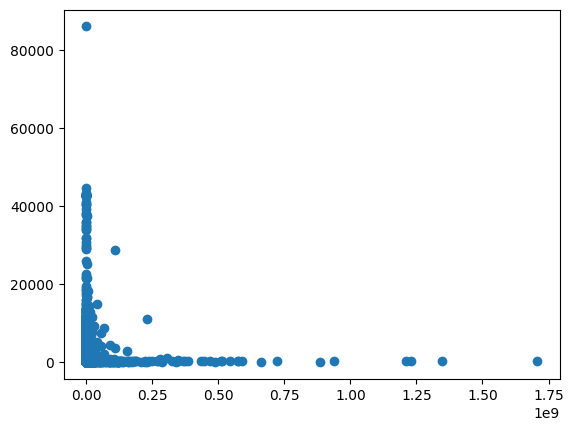

In [29]:
plt.scatter(df_normal_preprocessed['viewCount'], df_normal_preprocessed['durationInt'])

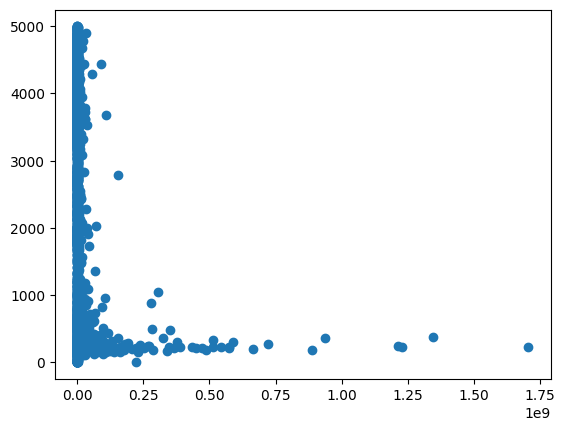

In [30]:
plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['durationInt'])

/tmp/ipykernel_187110/475232018.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])
/tmp/ipykernel_187110/475232018.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])


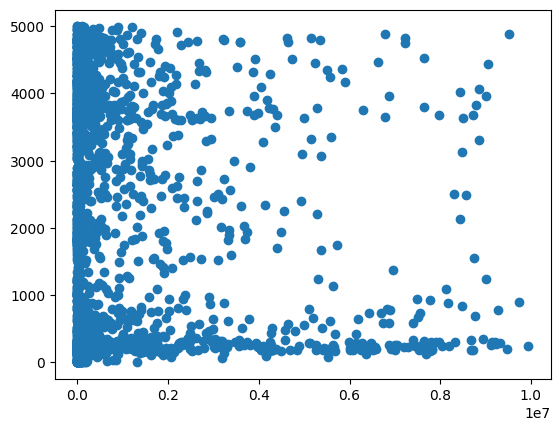

In [31]:
plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])


##### The relationship between attributes

In [32]:
print(df_normal_preprocessed.head(5))

             id                                              title  \
1   dxrYz563OdY  NHẠC TẬP GYM💪NHẠC TẬP GYM CỰC HAY 2020💪MUSIQUE...   
10  O8_tb1pDU8g  Top 10 Bản Nhạc EDM Mix Cực Phiêu ♫ Gây Nghiện...   
11  D1iLQpNjjUk  Nhạc Không Lời Sôi Động, Vui Tươi, Tạo Động Lự...   
13  lx5wQRUg6UQ  VIỆT MIX TẬP GYM |#21| NHẠC TẬP GYM 2022 | ĐỘN...   
16  wY-gdjBUuMk  Best Workout Music Mix 2023 🔥 Gym Motivation M...   

                                          description           channelTitle  \
1   ►NHẠC TẬP GYM💪NHẠC TẬP GYM CỰC HAY 2020💪MUSIQU...   Đình Khởi Production   
10  #yeuedm #nhacdientu #nhacedmgaynghien #edm\n__...                Yêu EDM   
11  Nhạc Không Lời Sôi Động, Vui Tươi, Tạo Động Lự...  Khoảng Lặng Cuộc Sống   
13  ➡️Đến Với Việt Hoàng Fitness Để Tìm Cảm Hứng T...     Việt Hoàng Fitness   
16  -   Best Workout Music Mix 2023 🔥 Gym Motivati...       Trap Workout Mix   

    categoryId                                               tags  \
1           10  ["nhạc_tập_gy

In [33]:
df_normal_preprocessed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4296 entries, 1 to 7470
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4296 non-null   object 
 1   title                 4296 non-null   object 
 2   description           4296 non-null   object 
 3   channelTitle          4296 non-null   object 
 4   categoryId            4296 non-null   int64  
 5   tags                  4296 non-null   object 
 6   defaultAudioLanguage  4296 non-null   object 
 7   publishedAt           4296 non-null   object 
 8   duration              4296 non-null   object 
 9   definition            4296 non-null   int64  
 10  caption               4296 non-null   int64  
 11  viewCount             4296 non-null   float64
 12  likeCount             4296 non-null   float64
 13  commentCount          4296 non-null   float64
 14  favoriteCount         4296 non-null   int64  
 15  topicCategories       4296

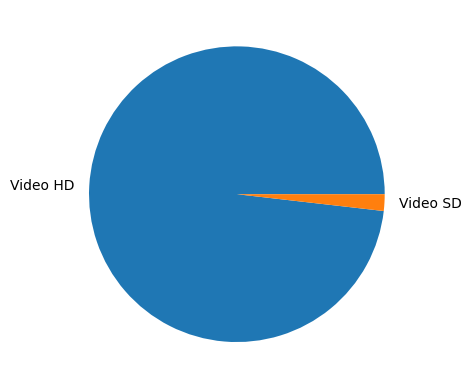

In [34]:
hd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
sd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([hd_videos.shape[0], sd_videos.shape[0]])
mylabel = ['Video HD', 'Video SD']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

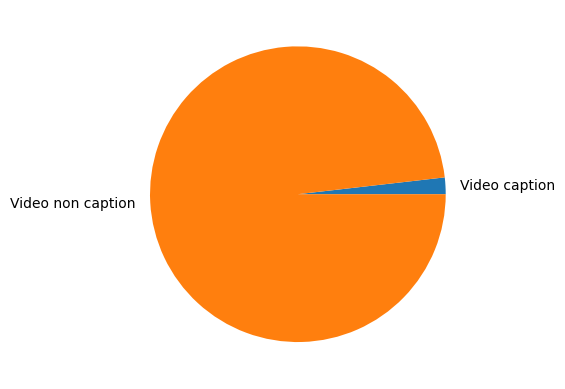

In [35]:
df_normal['caption'].unique()

caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([caption_videos.shape[0], non_caption_videos.shape[0]])
mylabel = ['Video caption', 'Video non caption']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

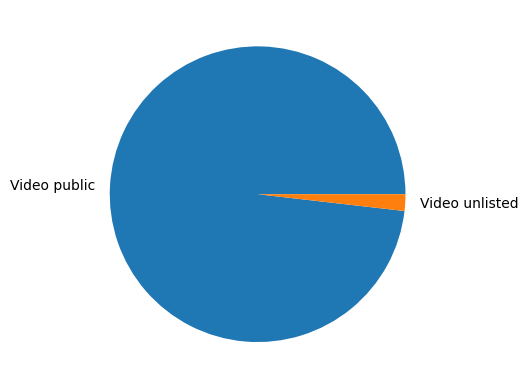

In [36]:
df_normal['privacyStatus'].unique()

public_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
unlisted_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([public_videos.shape[0], unlisted_videos.shape[0]])
mylabel = ['Video public', 'Video unlisted']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

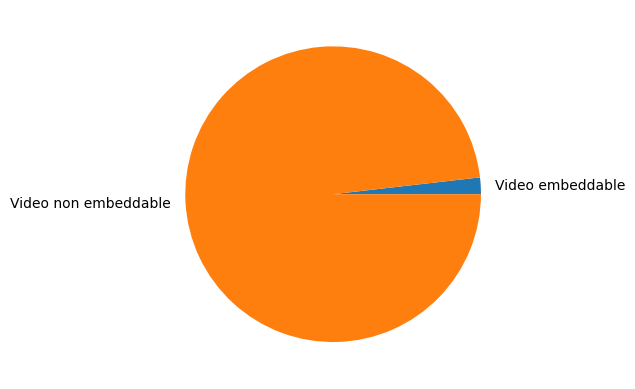

In [37]:
embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([embeddable_videos.shape[0], non_embeddable_videos.shape[0]])
mylabel = ['Video embeddable', 'Video non embeddable']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

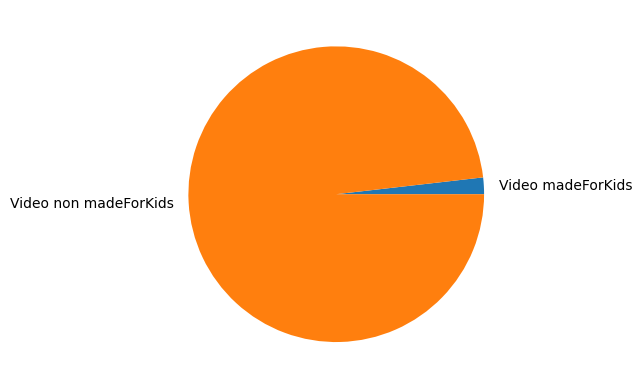

In [38]:
madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([madeForKids_videos.shape[0], non_madeForKids_videos.shape[0]])
mylabel = ['Video madeForKids', 'Video non madeForKids']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

#### Convert text to vector IF TDF

In [39]:
def convertIfTdf(df, column, stopwords):
    data_train = df[column]
    data_train = removeStopword(data_train, stopwords)

    module_count_vector = TfidfVectorizer(stop_words=stopwords)
    model_rf_preprocess = Pipeline([('vect', module_count_vector),
                        ('tfidf', TfidfTransformer()),
                        ])
    # Hàm thực hiện chuyển đổi dữ liệu text thành dữ liệu số dạng ma trận 
    # Input: Dữ liệu 2 chiều dạng numpy.array, mảng nhãn id dạng numpy.array 
    data_preprocessed = module_count_vector.fit_transform(data_train)

    print(f"\nNumber of words in the dictionary: {len(module_count_vector.vocabulary_)}")
    print(f"Data size after processing: {data_preprocessed.shape}")
    print(f"View the words in the dictionary: {module_count_vector.vocabulary_}")
    print(type(data_preprocessed))
    return data_preprocessed

In [40]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nhạc', 'âm', 'hát', 'tuyển', 'tập', 'bài', 'những', 'ca', ' x ', 'ft','feat']
X = convertIfTdf(df_normal_preprocessed,'title', stopwords)
print(type(X))


Number of words in the dictionary: 4042
Data size after processing: (4296, 4042)
View the words in the dictionary: {'gym': 1161, 'cực': 787, 'hay': 1215, '2020': 100, 'musique': 1926, 'pour': 2478, 'faire': 992, 'du': 882, 'sport': 2795, 'electronique': 949, 'top': 3129, '10': 12, 'bản': 504, 'edm': 941, 'mix': 1885, 'phiêu': 2403, 'gây': 1168, 'nghiện': 2054, 'mạnh': 1975, '2022': 104, 'không': 1529, 'lời': 1789, 'sôi': 2872, 'động': 3792, 'vui': 3436, 'tươi': 3296, 'tạo': 3304, 'lực': 1800, '18': 80, 'việt': 3418, '21': 109, 'best': 371, 'workout': 3548, '2023': 105, 'motivation': 1914, 'playlist': 2466, 'bass': 347, 'hip': 1247, 'hop': 1275, '107': 23, 'aerobic': 257, 'nhất': 2162, 'no': 2189, 'copyright': 686, 'infringement': 1404, 'intended': 1411, 'ngoại': 2066, 'remix': 2586, 'cho': 580, 'dân': 901, '2021': 103, '19': 81, 'trẻ': 3212, 'hiện': 1259, 'nay': 2032, 'nonstop': 2195, 'dj': 846, 'vinahouse': 3400, 'sàn': 2855, 'thể': 3069, 'hình': 1329, 'chất': 635, '2018': 98, 'rap':

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


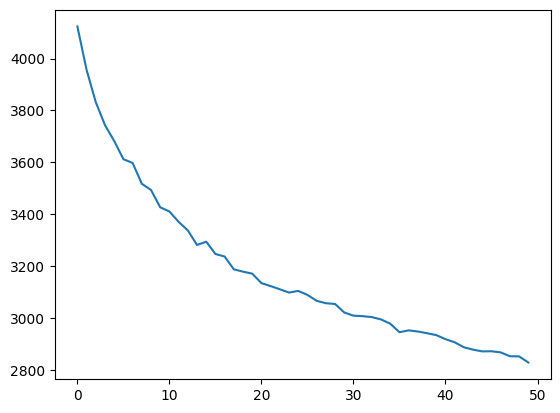

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
loss = []
for i in range(50):
    i = i + 1
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    loss.append(kmeans.inertia_)
plt.plot(range(50), loss)

In [42]:
clustering = KMeans(n_clusters=10,init='k-means++', random_state=0).fit(X)
clustering.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00367423, 0.00556102, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00040869, 0.        , 0.00039678, ..., 0.00010509, 0.00010509,
        0.00010509]])

In [43]:
label = clustering.labels_
print(label.shape)
for i in label:
    print(i)

(4296,)
7
9
9
7
7
7
9
7
7
6
7
7
7
7
7
7
7
7
9
7
7
7
9
7
9
7
7
7
9
7
7
7
7
7
7
7
0
7
7
7
9
9
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
9
7
7
7
7
7
7
7
7
7
7
7
7
7
7
3
7
7
7
9
7
7
7
7
7
7
7
7
7
7
7
7
3
7
7
7
7
7
7
7
7
7
7
9
7
9
7
7
9
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
9
7
7
7
7
7
9
7
7
7
7
7
9
7
7
7
9
7
9
9
8
0
0
9
9
9
9
9
9
0
8
9
0
8
9
9
9
0
9
9
9
8
0
9
9
8
8
9
8
9
9
0
9
8
8
8
8
9
8
8
9
9
8
8
9
9
8
8
8
8
0
8
8
9
8
9
8
9
8
9
8
9
8
0
9
0
8
9
9
9
9
8
8
8
8
9
8
9
9
8
8
8
8
0
8
8
8
9
8
8
8
8
9
9
8
8
8
9
9
8
9
8
8
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
8
8
8
8
8
8
9
0
8
8
9
8
8
8
8
9
8
8
8
8
9
8
9
9
8
8
9
9
8
8
8
9
8
8
8
8
8
8
9
8
8
8
9
9
8
8
9
9
8
8
8
8
8
8
8
8
8
9
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
8
8
8
8
8
8
9
8
9
8
8
9
8
8
8
8
8
8
9
8
9
8
8
9
8
9
8
8
0
8
8
8
9
9
8
8
8
9
8
8
9
8
8
8
9
8
8
8
8
9
9
9
8
8
8
8
8
8
9
9
9
8
9
8
9
9
8
9
8
0
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
9
8
8
9
9
8
8
8
9
8
9
9
9
9
8
8
9
9
9
9
9
9
9
9
3
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
0
3
9
0
0
0
9
8
9
9
9
9
9
9
0
9
0
9
9
0
9


In [44]:
temp_df = df_normal_preprocessed.assign(label=label)
temp_df = temp_df.assign(topics = listTopics)
temp_df.info()

for i in range(len(np.unique(label))):
    print(i)
    filter_df = temp_df[label==i]
    filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4296 entries, 1 to 7470
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4296 non-null   object 
 1   title                 4296 non-null   object 
 2   description           4296 non-null   object 
 3   channelTitle          4296 non-null   object 
 4   categoryId            4296 non-null   int64  
 5   tags                  4296 non-null   object 
 6   defaultAudioLanguage  4296 non-null   object 
 7   publishedAt           4296 non-null   object 
 8   duration              4296 non-null   object 
 9   definition            4296 non-null   int64  
 10  caption               4296 non-null   int64  
 11  viewCount             4296 non-null   float64
 12  likeCount             4296 non-null   float64
 13  commentCount          4296 non-null   float64
 14  favoriteCount         4296 non-null   int64  
 15  topicCategories       4296

In [45]:
def drawWordCloud(df, column, stopwords):
  for i in range(len(np.unique(label))):
      
      #Extract cleaned text column
      data=df[df['label']==i][column].values
      data = removeStopword(data, stopwords)
      list_of_words=[];
      for sent in data:
        if type(sent)!=str:
          continue
        for word in sent.split():
          list_of_words.append(word)  
      final_text=" ".join(list_of_words)
      wordcloud = WordCloud(collocations=False).generate(final_text)
      plt.figure()
      title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
      plt.title(title)
      plt.imshow(wordcloud, interpolation="bilinear")
      plt.axis("off")
      plt.show()

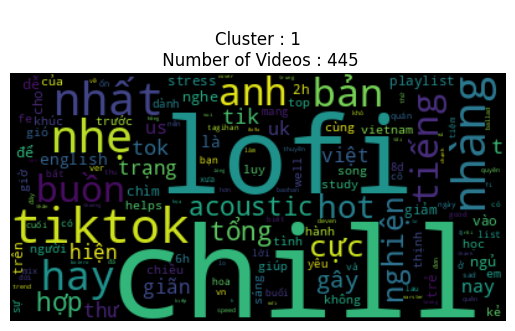

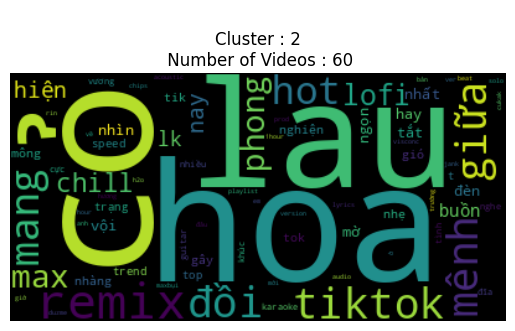

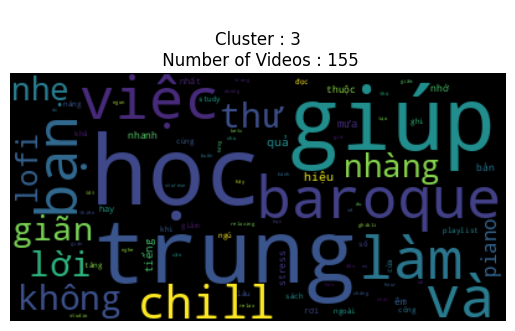

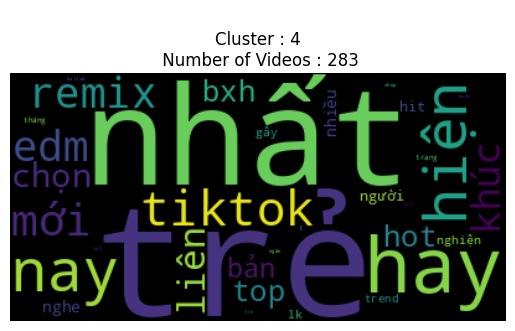

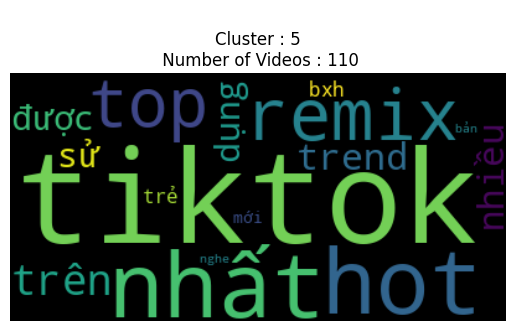

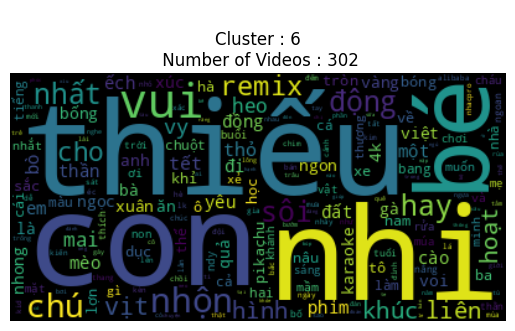

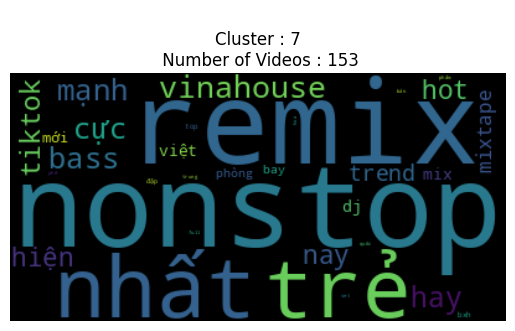

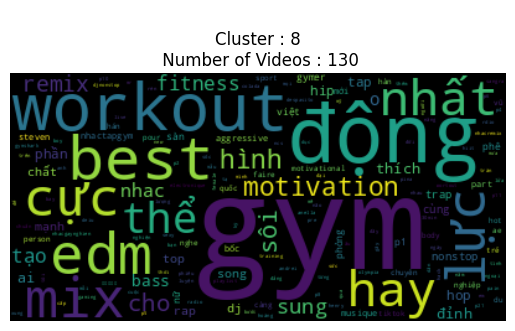

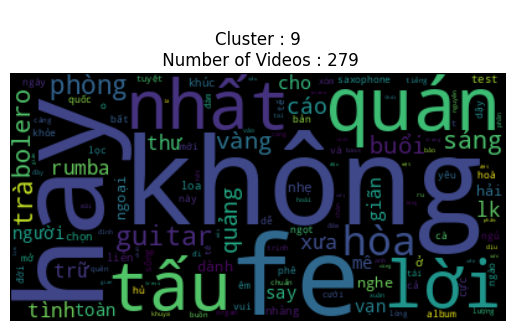

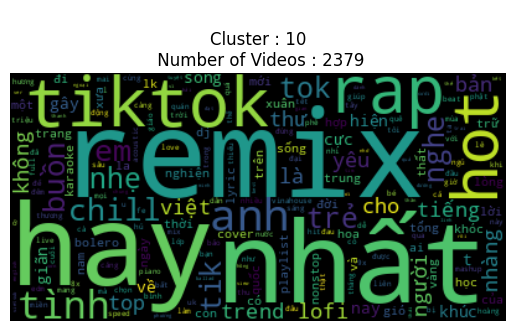

In [46]:
drawWordCloud(temp_df,'title', stopwords)


0


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


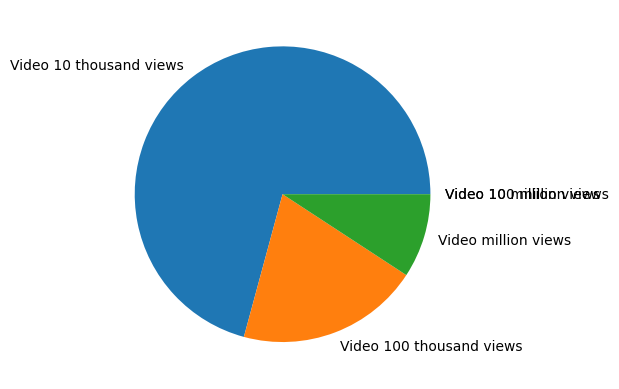

1


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


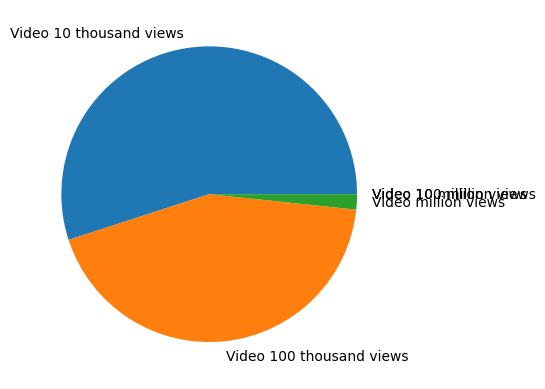

2


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


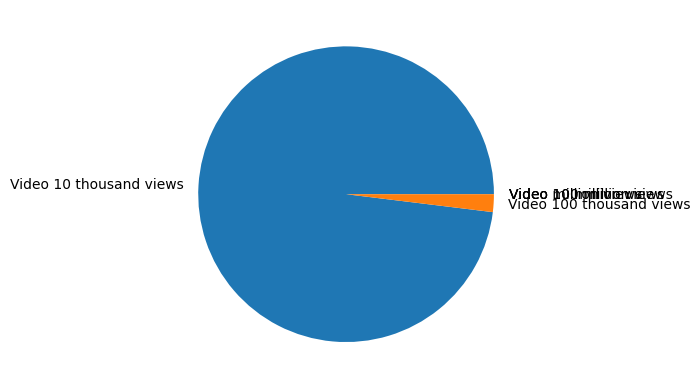

3


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


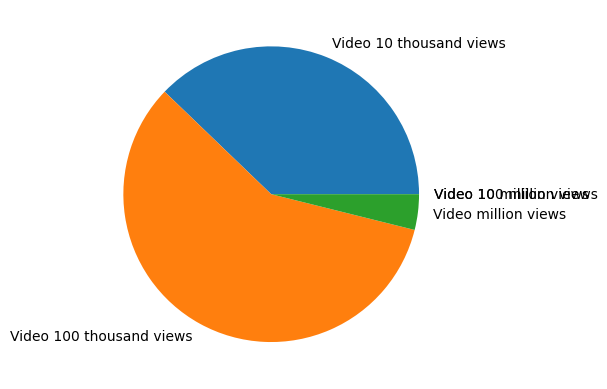

4


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


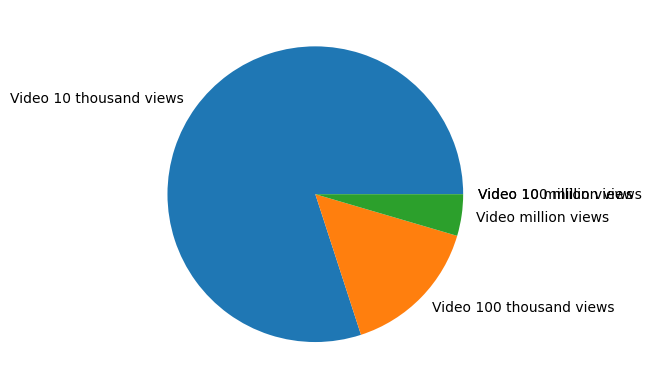

5


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


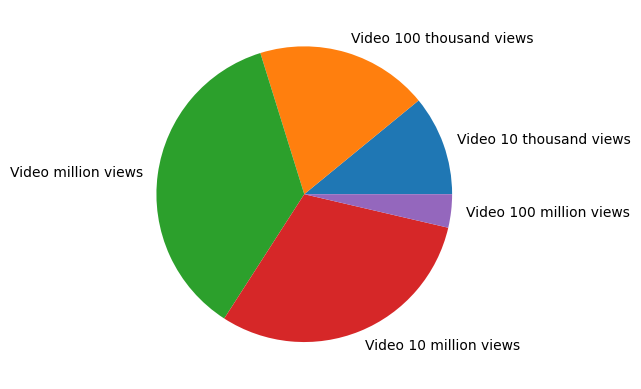

6


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


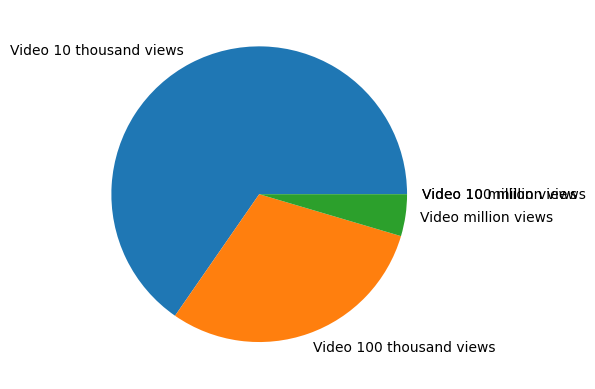

7


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


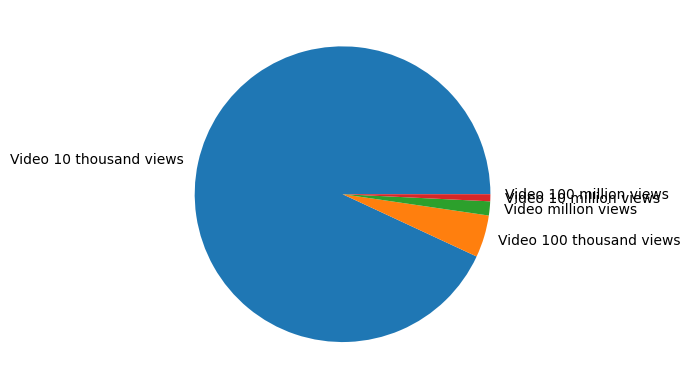

8


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


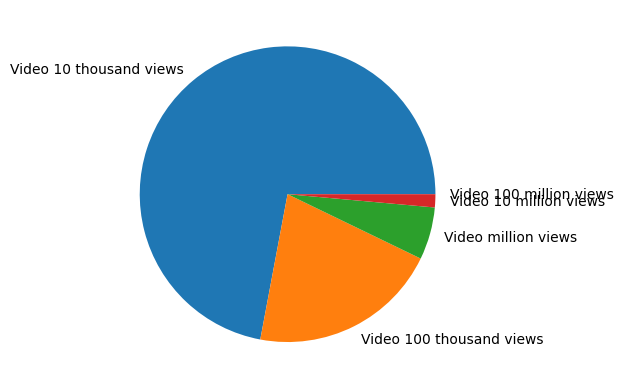

9


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


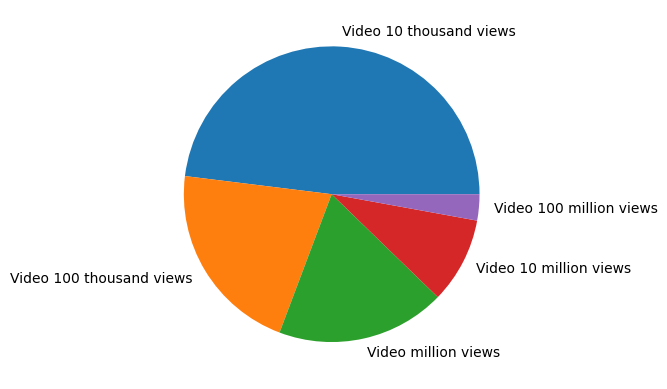

In [47]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(temp_df[temp_df['label']==i])

In [48]:
clustered_df = temp_df.groupby(['label']).sum()

In [49]:
clustered_df[['viewCount', 'likeCount', 'durationInt']]

,viewCount,likeCount,durationInt
label,,,
0,1.488051e+08,1398557.0,1855851
1,8.707515e+06,113354.0,274981
2,2.987814e+06,10797.0,699010
3,8.469806e+07,243038.0,1537866
4,3.085209e+07,251773.0,465777
5,6.133179e+09,12754539.0,371085
6,3.984437e+07,474149.0,671637
7,2.999502e+07,210182.0,434760
8,1.589142e+08,1552492.0,3513901


In [50]:
abnormal_cluster = temp_df[temp_df['label']==9]

In [51]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nhạc', 'âm', 'hát', 'tuyển', 'tập', 'bài', 'những', 'ca', ' x ', 'ft','feat']
X_abnormal = convertIfTdf(abnormal_cluster,'title', stopwords)
print(type(X_abnormal))
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0).fit(X_abnormal)
kmeans.cluster_centers_

label = kmeans.labels_

print(label.shape)
for i in label:
    print(i)
abnormal_cluster = abnormal_cluster.assign(label = label)


Number of words in the dictionary: 3744
Data size after processing: (2379, 3744)
View the words in the dictionary: {'top': 2872, '10': 10, 'bản': 410, 'edm': 820, 'mix': 1720, 'cực': 673, 'phiêu': 2180, 'gây': 1033, 'nghiện': 1876, 'mạnh': 1802, '2022': 63, 'không': 1381, 'lời': 1629, 'sôi': 2627, 'động': 3498, 'vui': 3163, 'tươi': 3032, 'tạo': 3039, 'lực': 1639, '18': 42, 'aerobic': 171, 'hay': 1079, 'nhất': 1972, 'gym': 1029, 'no': 1998, 'copyright': 576, 'infringement': 1260, 'intended': 1267, 'chế': 535, 'chuyện': 494, 'lần': 1606, 'đầu': 3462, 'hậu': 1214, 'hoàng': 1149, '20': 49, 'khiến': 1353, 'bạn': 409, 'vẻ': 3211, 'bắt': 420, 'một': 1829, 'ngày': 1902, 'mới': 1830, 'tràn': 2918, 'đầy': 3463, 'năng': 2046, 'lượng': 1597, '2019': 59, 'nonstop': 2004, 'việt': 3146, 'quẫy': 2307, 'tung': 2974, 'phòng': 2199, 'đã': 3426, 'từng': 3073, 'khóc': 1379, 'xuyên': 3303, 'đêm': 3430, '2023': 64, 'thể': 2813, 'dục': 813, 'vinahouse': 3131, 'chiến': 476, 'đét': 3428, 'tăng': 3027, 'dame': 

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


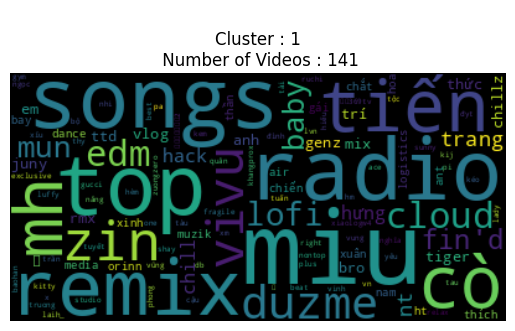

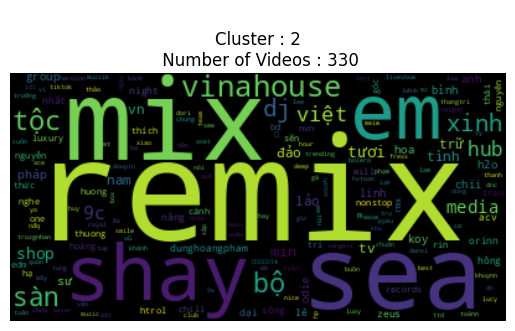

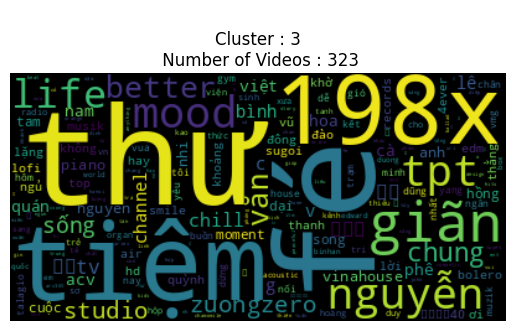

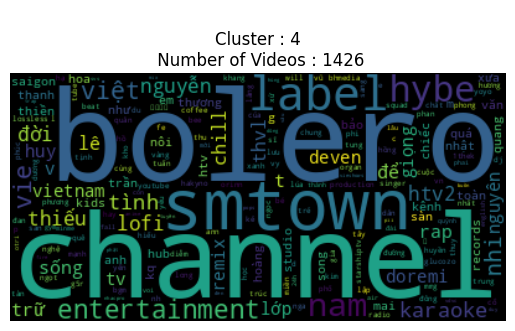

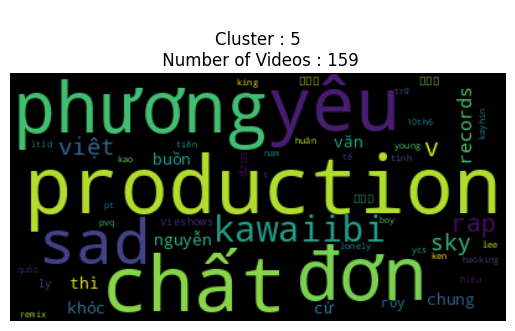

In [52]:
for i in range(len(np.unique(label))):
    
    #Extract cleaned text column
    data=abnormal_cluster[abnormal_cluster['label']==i]['channelTitle'].values
    data = removeStopword(data, stopwords)
    list_of_words=[];
    for sent in data:
      if type(sent)!=str:
        continue
      for word in sent.split():
        list_of_words.append(word)  
    final_text=" ".join(list_of_words)
    wordcloud = WordCloud(collocations=False).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

0


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


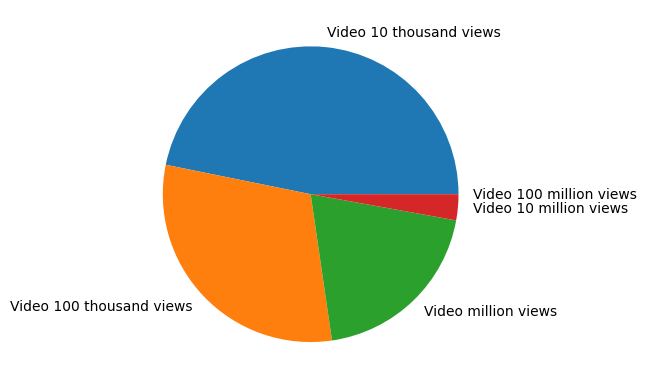

1


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


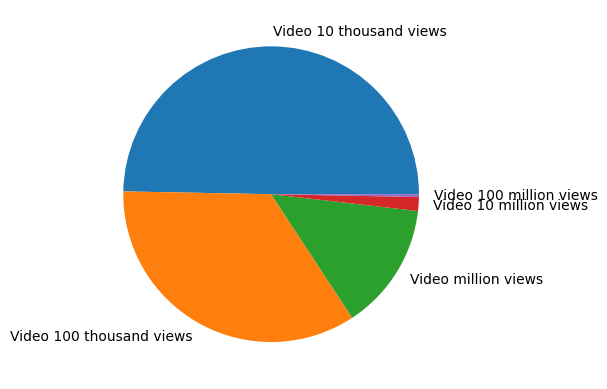

2


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


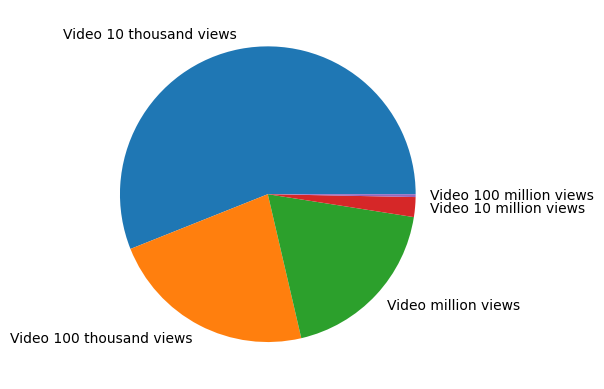

3


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


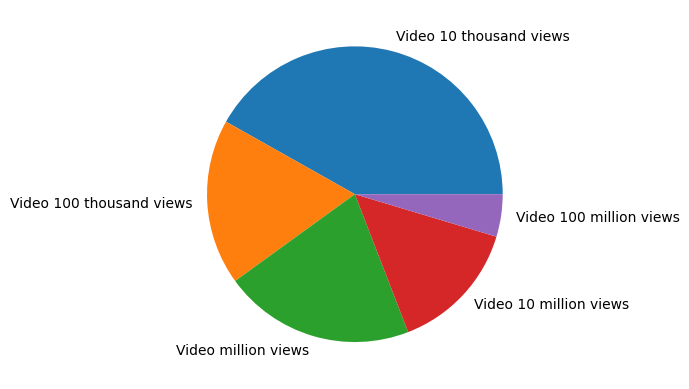

4


/tmp/ipykernel_187110/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/tmp/ipykernel_187110/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/tmp/ipykernel_187110/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/tmp/ipykernel_187110/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


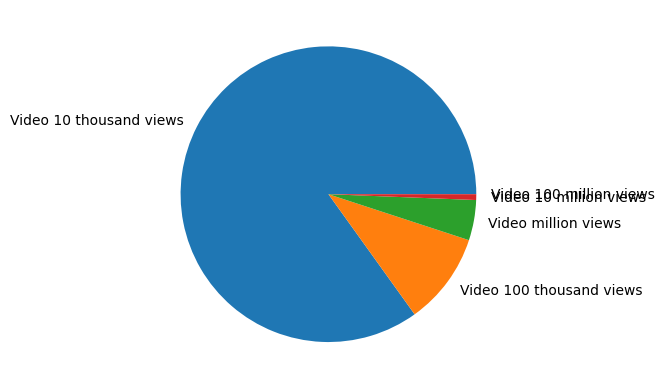

In [53]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(abnormal_cluster[abnormal_cluster['label']==i])

In [54]:
clustered_02_abnormal = abnormal_cluster[abnormal_cluster['label']!=2].sum()
clustered_02_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      31890728254.0
likeCount        558357990.0
durationInt          5701523
dtype: object

In [55]:
clustered_01_abnormal = abnormal_cluster[abnormal_cluster['label']==2].sum()
clustered_01_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      479737006.0
likeCount        2726253.0
durationInt        1543794
dtype: object

In [56]:
for item in abnormal_cluster[abnormal_cluster['label']==0]['title']:
    print(item)

Cafe Không Đường (Orinn Remix) - JOMBIE x TKAN & BEAN | Nhạc Remix Tik Tok Căng Cực Gây Nghiện 2021
[ Playlist] Là Anh | TOP Những Bản Nhạc Trung Quốc Hay Nhất 2023 | Nhạc Hoa Tâm Trạng | Nhạc Tik Tok
Nhạc Xuân Chill 2023 - Thì Thầm Mùa Xuân - Nhạc Tết EDM Tik Tok Htrol Nhẹ Nhàng Cực Chill
Nhạc English Chill Tik Tok - (Playlist) Build a B*tch, CUPID, Flowers, Cool Kids (Lyrics + Vietsub)
Nhạc Tik Tok Hay 2022 | Học Tiếng Anh Qua Bài Hát Nhạc English Chill Tik Tok (Lyrics + Vietsub)
Nhạc Tik Tok Hay 2023 | Học Tiếng Anh Qua Những Bài Nhạc US-UK Chill Hay Nhất (Lyrics + Vietsub)
Nhạc Tik Tok Hay 2022 | Học Tiếng Anh Qua Bài Hát (Lyrics + Vietsub) ♫ NHẠC QUỐC TẾ HAY NHẤT 2022
Nhạc Tik Tok Hay 2022 | Học Tiếng Anh Qua Bài Hát Us-Uk Hay (Lyrics + Vietsub) -Tiktok viral songs
Nhạc Tik Tok Hay 2022 | Học Tiếng Anh Qua Bài Hát Us-Uk (Lyrics + Vietsub) - Trending Tiktok songs
Nhạc Tik Tok Hay 2022 | Học Tiếng Anh Qua Bài Hát Hot Tik Tok Nhẹ Nhàng Cực Chill (Lyrics + Vietsub)
Nhạc Hot Tik Tok | 

In [57]:
print(wordcloud.words_)

{'production': 1.0, 'chất': 0.9444444444444444, 'yêu': 0.8611111111111112, 'đơn': 0.8611111111111112, 'phương': 0.8611111111111112, 'sad': 0.75, 'kawaiibi': 0.7222222222222222, 'v': 0.25, 'rap': 0.25, 'việt': 0.2222222222222222, 'sky': 0.19444444444444445, 'records': 0.1388888888888889, 'buồn': 0.1111111111111111, 'thì': 0.1111111111111111, 'cứ': 0.1111111111111111, 'khóc': 0.1111111111111111, 'nguyễn': 0.1111111111111111, 'văn': 0.1111111111111111, 'chung': 0.1111111111111111, 'roy': 0.08333333333333333, 'vieshows': 0.05555555555555555, '바카라': 0.05555555555555555, '생방송': 0.05555555555555555, '픽공개': 0.05555555555555555, 'dzus': 0.05555555555555555, 'ly': 0.05555555555555555, 'nam': 0.027777777777777776, 'trữ': 0.027777777777777776, 'tình': 0.027777777777777776, 'king': 0.027777777777777776, 'tiến': 0.027777777777777776, 's': 0.027777777777777776, 'huân': 0.027777777777777776, 'young': 0.027777777777777776, 'ycs': 0.027777777777777776, 'boy': 0.027777777777777776, 'pvq': 0.0277777777777